# 1 
## 1.a


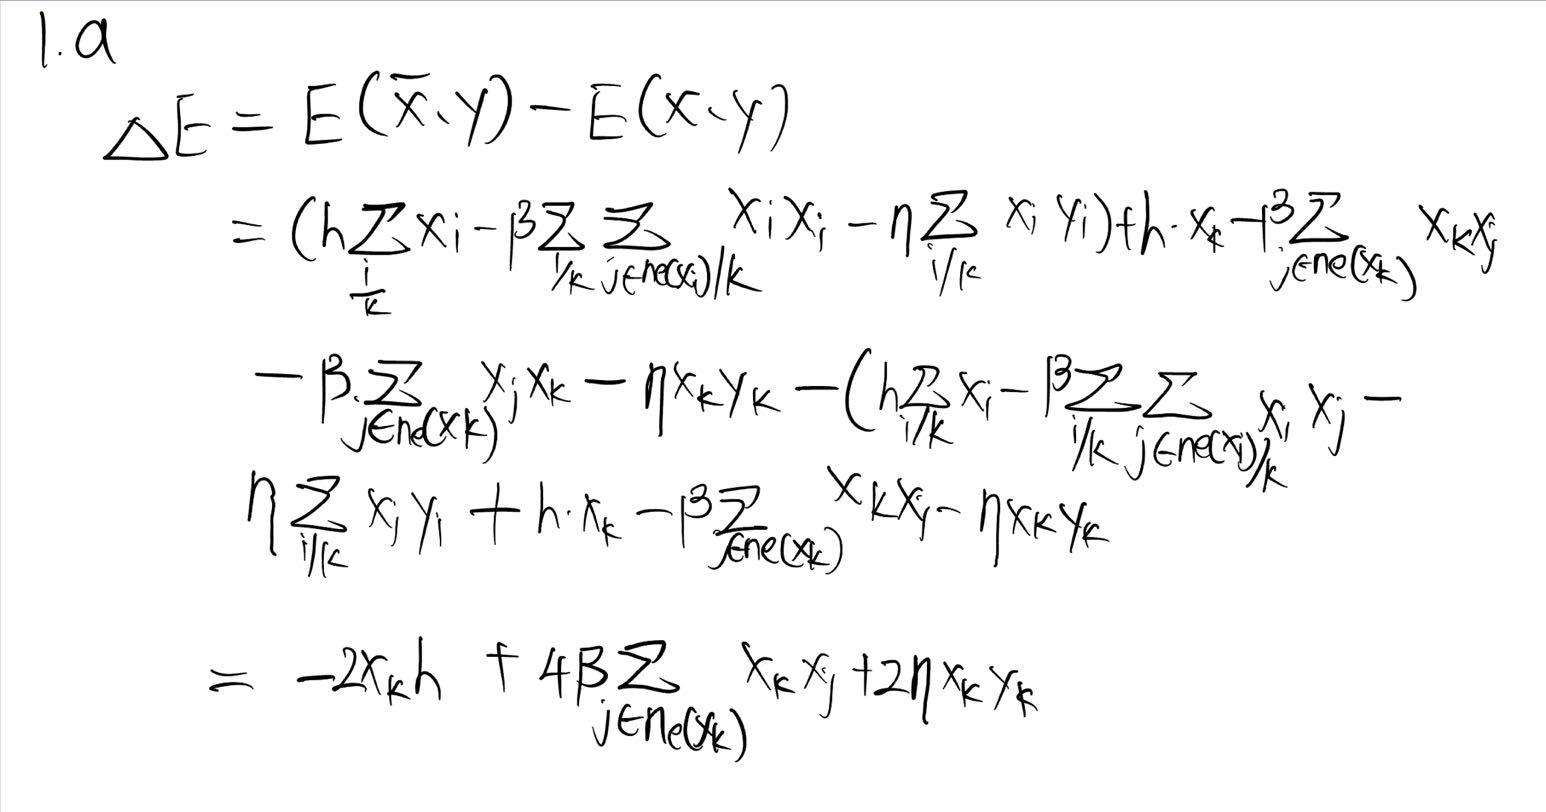

## 1.2
Use opencv to read photos.

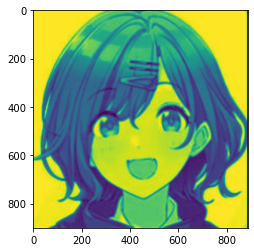

In [167]:
import cv2
import numpy as np
import matplotlib.image as cv
import matplotlib.pyplot as plt
import copy
img = cv.imread('C:/Users/77942/Desktop/2023 spring/491/test.png')
img = img.copy()
img = img[: , :, 1]
plt.imshow(img)
plt.show()

Randomly add some noise less （flip）

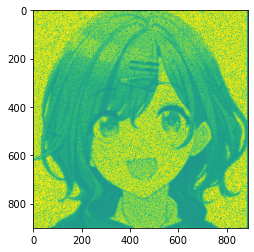

In [168]:
def noise(img):
    m, n = np.shape(img)
    img = np.copy(img)
    for i in range(m):
        for j in range(n):
            if np.random.rand() >= 0.9:
                img[i][j] = -img[i][j]
    return img
noised_img = noise(img)
plt.imshow(noised_img)
plt.show()

Iterate through all pixels, calculate the energy change $\Delta E$, if $\Delta E$ is negative, flip the pixel because it is more likely to be noise

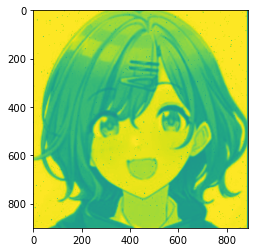

In [169]:
def neighbor_sum(x, i, j, more_flag = False):
    def get_pix(x, i, j):
        try:
            return x[i][j]
        except IndexError:
            return 0
    if not more_flag:
        sum = x[i][j] * (get_pix(x, i+1, j) + get_pix(x, i-1, j) + get_pix(x, i, j+1) + get_pix(x, i, j-1))
    else:
        sum = x[i][j] * (get_pix(x, i+1, j) + get_pix(x, i-1, j) + get_pix(x, i, j+1) + get_pix(x, i, j-1)
                    + get_pix(x, i+1, j+1) + get_pix(x, i-1, j-1) + get_pix(x, i-1, j+1) + get_pix(x, i+1, j-1)
                    + get_pix(x, i+2, j) + get_pix(x, i-2, j) + get_pix(x, i, j+2) + get_pix(x, i, j-2))
    return sum
def denoise(img, h=5, beta=5, eta=5):
    m, n = np.shape(img)
    x = np.copy(img)
    y = np.copy(img)
    k = 0
    change = []
    energy = 0
    for i in range(m):
        for j in range(n):
            xi = x[i][j]
            neighbor_term = 4 * beta * neighbor_sum(x, i, j, more_flag = True)
            delta = -2 * h * xi + 4 * beta * neighbor_sum(x, i, j) + 2 * eta * xi * y[i][j]
            if delta < 0:
                x[i][j] = -x[i][j]
                energy += delta
            k += 1
            change.append(energy)
    return x

denoised_img = denoise(noised_img, 0, 2, 2) 
plt.imshow(denoised_img)
plt.show()

# 1.3

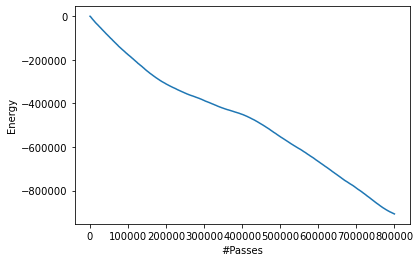

In [170]:
def energy_vs(img, h=5, beta=5, eta=5):
    m, n = np.shape(img)
    x = np.copy(img)
    y = np.copy(img)
    k = 0
    change = []
    energy = 0
    for i in range(m):
        for j in range(n):
            xi = x[i][j]
            neighbor_term = 4 * beta * neighbor_sum(x, i, j, more_flag = True)
            delta = -2 * h * xi + 4 * beta * neighbor_sum(x, i, j) + 2 * eta * xi * y[i][j]
            if delta < 0:
                x[i][j] = -x[i][j]
                energy += delta
            k += 1
            change.append(energy)

    plt.plot([i for i in range(k)], change)
    plt.xlabel("#Passes")
    plt.ylabel("Energy")
    plt.show()
    return x
denoised_img = energy_vs(noised_img, 0, 2, 2)

# 1.4

Noised limage:

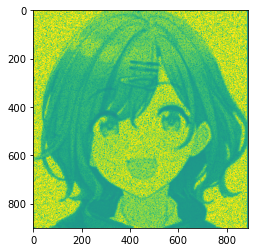

In [171]:
noised_img = noise(img)
plt.imshow(noised_img)
plt.show()

50% denoised:

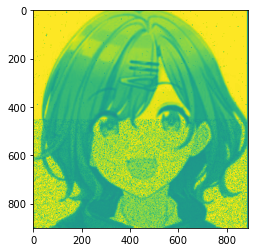

In [172]:
def denoise_50(img, h=5, beta=5, eta=5):
    m, n = np.shape(img)
    x = np.copy(img)
    y = np.copy(img)
    k = 0
    change = []
    energy = 0
    for i in range(m):
        for j in range(n):
            xi = x[i][j]
            neighbor_term = 4 * beta * neighbor_sum(x, i, j, more_flag = True)
            delta = -2 * h * xi + 4 * beta * neighbor_sum(x, i, j) + 2 * eta * xi * y[i][j]
            if delta < 0:
                x[i][j] = -x[i][j]
                energy += delta
            k += 1
            change.append(energy)
            if k > m * n // 2:
                break
    return x

denoised_img = denoise_50(noised_img, 0, 2, 2) 
plt.imshow(denoised_img)
plt.show()

100% denoised:

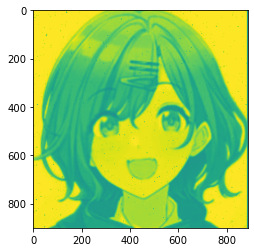

In [173]:
denoised_img = denoise(noised_img, 0, 2, 2) 
plt.imshow(denoised_img)
plt.show()

## 1.4
 My understanding of the role of h in the model is that it acts as a crucial bias that guides the model's preference towards certain pixel values over others. Essentially, the value of h determines whether the model will prioritize pixels with a 1-value (white) or a -1-value (black) in the input data.

When the value of h is positive (h > 0), the model will tend to prefer pixels with a 1-value, which are typically associated with brighter or more prominent features in the image. On the other hand, if the value of h is negative (h < 0), the model will be biased towards pixels with a -1-value, which are generally associated with darker or less prominent features.

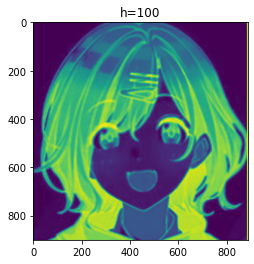

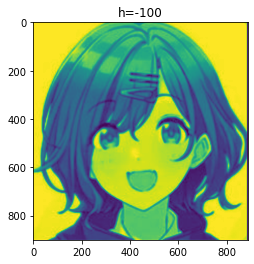

In [174]:
denoised_img = denoise(noised_img, 100, 1, 1) 
plt.imshow(denoised_img)
plt.title("h=100")
plt.show()
denoised_img = denoise(noised_img, -100, 1, 1) 
plt.imshow(denoised_img)
plt.title("h=-100")
plt.show()

The β term is a crucial factor that governs the relationship between pixels in the image. Essentially, it determines the degree to which nearby pixels will tend to have similar values, giving rise to a "clustered" or more homogeneous appearance in the resulting picture. As we increase the value of β, the image becomes increasingly smooth and denoised, with nearby pixels tending to converge towards a common value.

However, if we set β to a negative value (β < 0), the model will tend to treat nearby pixels as independent and unrelated to one another, resulting in a much noisier output. In such cases, the image may appear disjointed and difficult to interpret, with little consistency or coherence between adjacent pixels.

In [ ]:
denoised_img = denoise(noised_img, 0, 1, 1) 
plt.imshow(denoised_img)
plt.title("beta=1")
plt.show()
denoised_img = denoise(noised_img, 0, -1, 1) 
plt.imshow(denoised_img)
plt.title("beta=-1")
plt.show()

The η term, on the other hand, represents the relationship between the original image and the noisy input. This term determines whether the model will favor retaining the noisy pixel values or attempting to correct them towards the original values. If η is set to a high value, the model will be more likely to retain the noisy pixel values, even if they deviate significantly from the original values. This can be useful in cases where the original image has very little noise, and we want to preserve as much of the original signal as possible.

However, when η is set to a negative value, the model will tend to encourage pixel flipping, resulting in significant loss of information and detail in the output. As we increase the value of η, the model becomes more reluctant to flip pixels, resulting in a higher degree of noise reduction and greater fidelity to the original image.

In [ ]:
denoised_img = denoise(noised_img, 0, 1, 1) 
plt.imshow(denoised_img)
plt.title("eta=1")
plt.show()
denoised_img = denoise(noised_img, 0, 1, -1) 
plt.imshow(denoised_img)
plt.title("eta=-1")
plt.show()

## 1.6
\begin{align*}
    E(x, y) = h \sum_{i} x_i - \beta \sum_i \sum_{j \in around(x_i)} x_i x_j - \beta \sum_i \sum_{k \in outer(i)} x_i x_k - \eta \sum_i x_i y_i \\
    \Delta E = -2 h \cdot x_k + 4\beta \sum_{j \in around(x_k)} x_k x_j + 4\beta  \sum_i \sum_{k \in outer(i)} x_i x_k + 2 \eta x_k y_k
\end{align*}
In order to improve the accuracy and effectiveness of my energy function, I have decided to expand the scope of its evaluation to include not only the four direct neighbors of the pixel-in-question, but also its four "corner neighbors." By incorporating these additional neighbors into the calculation, I will be able to capture a wider range of contextual information and achieve a more comprehensive understanding of the image.

Furthermore, I recognize that in some cases, the influence of a pixel's more distant neighbors may be just as important as that of its immediate neighbors. To account for this, I have decided to expand the scope of evaluation by one extra "layer," so that each pixel-in-question will take into consideration the more distant neighbor of its neighbors as well.

By incorporating these enhancements into my energy function, I am confident that I will be able to achieve a more accurate and effective representation of the image. By taking into account a wider range of contextual information and expanding the scope of evaluation to include more distant neighbors, I can capture a more complete understanding of the underlying patterns and relationships within the image. Ultimately, this will enable me to make more informed decisions and achieve better outcomes in my image processing applications.

here is the examples :
original: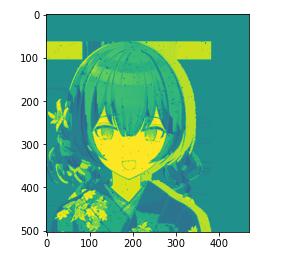

updated: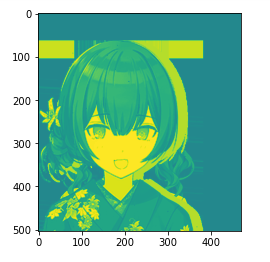

# 2
## 2.1

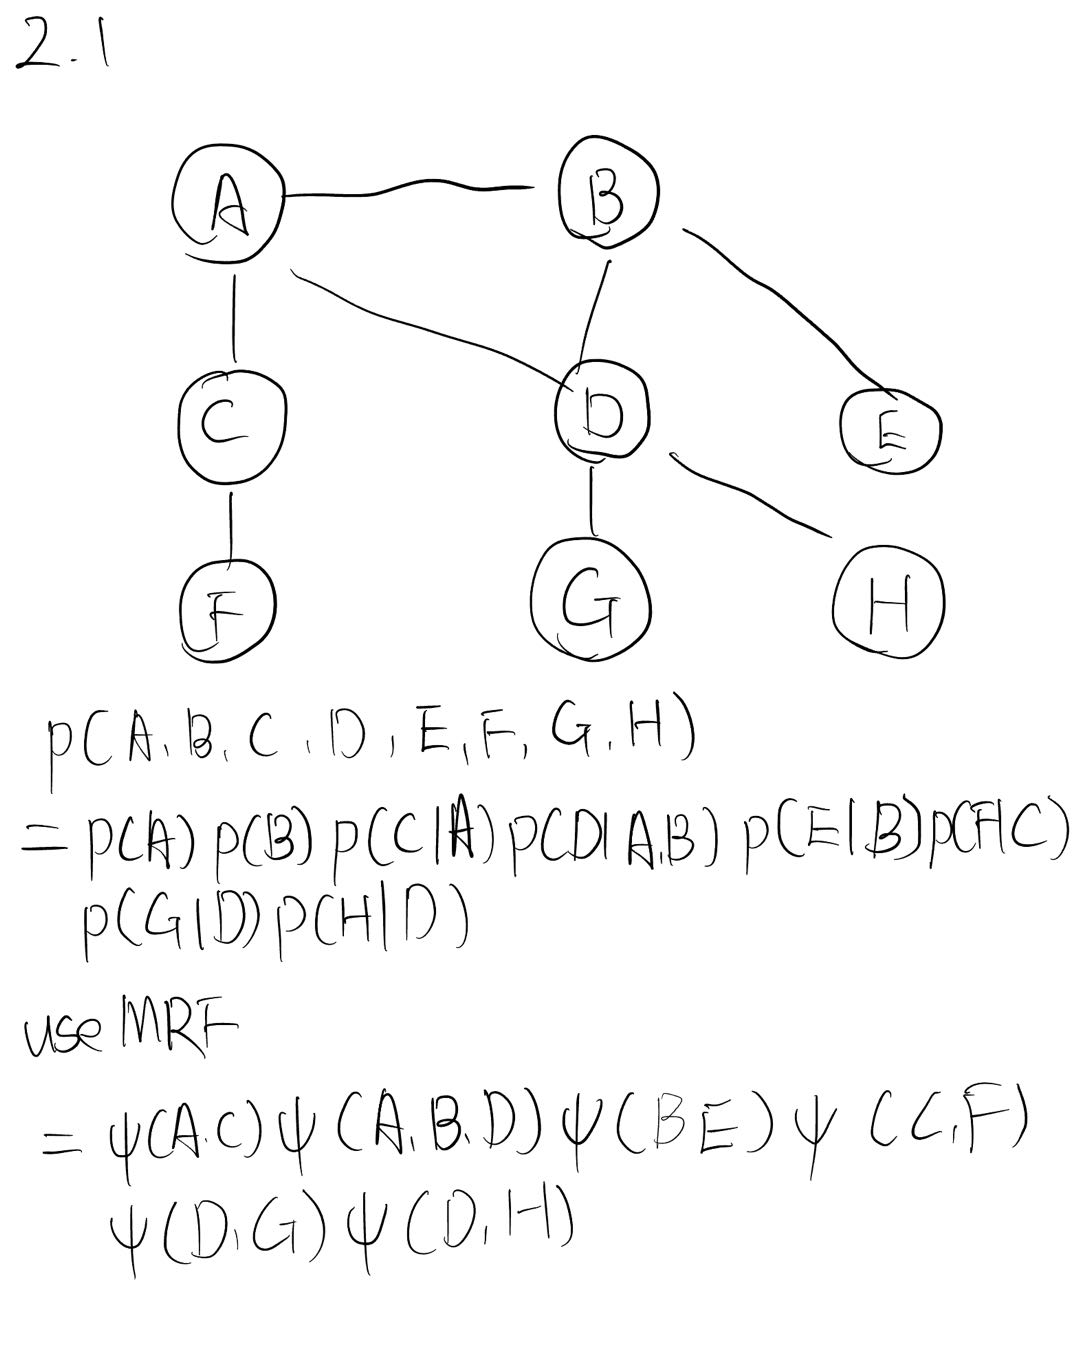

## 2.2

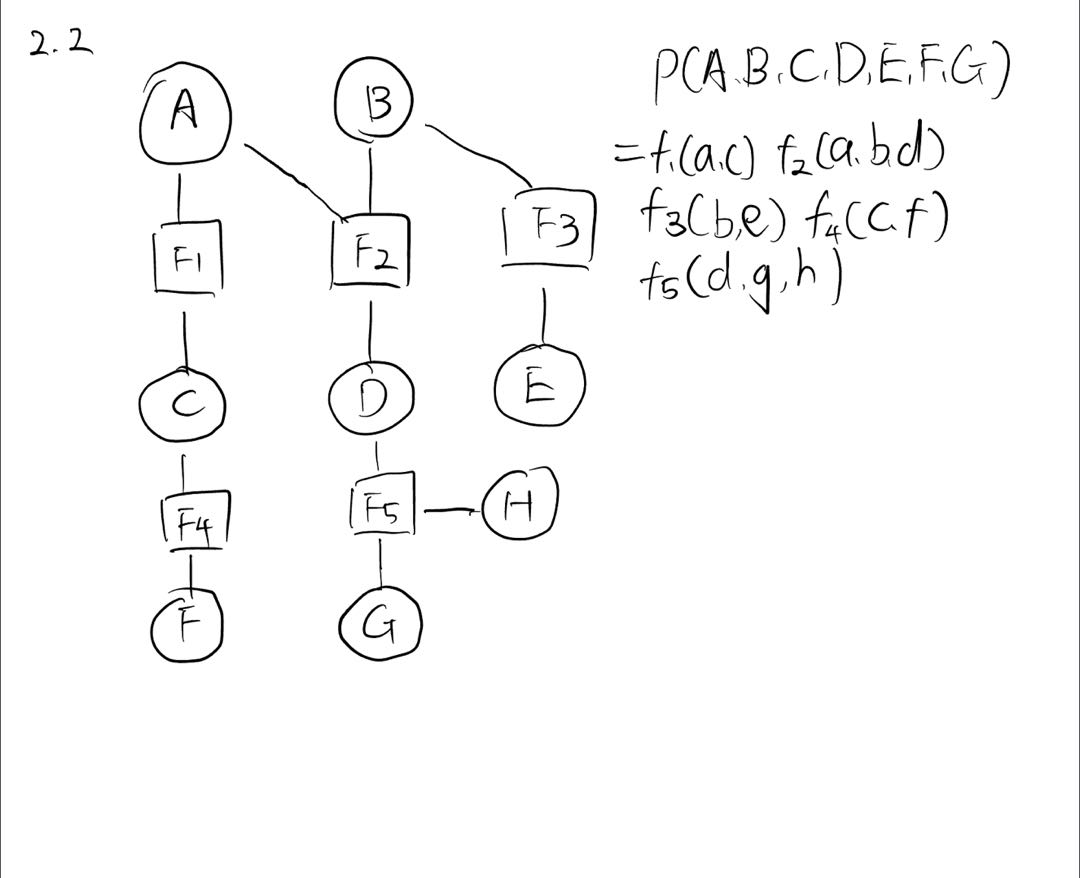

## 2.3
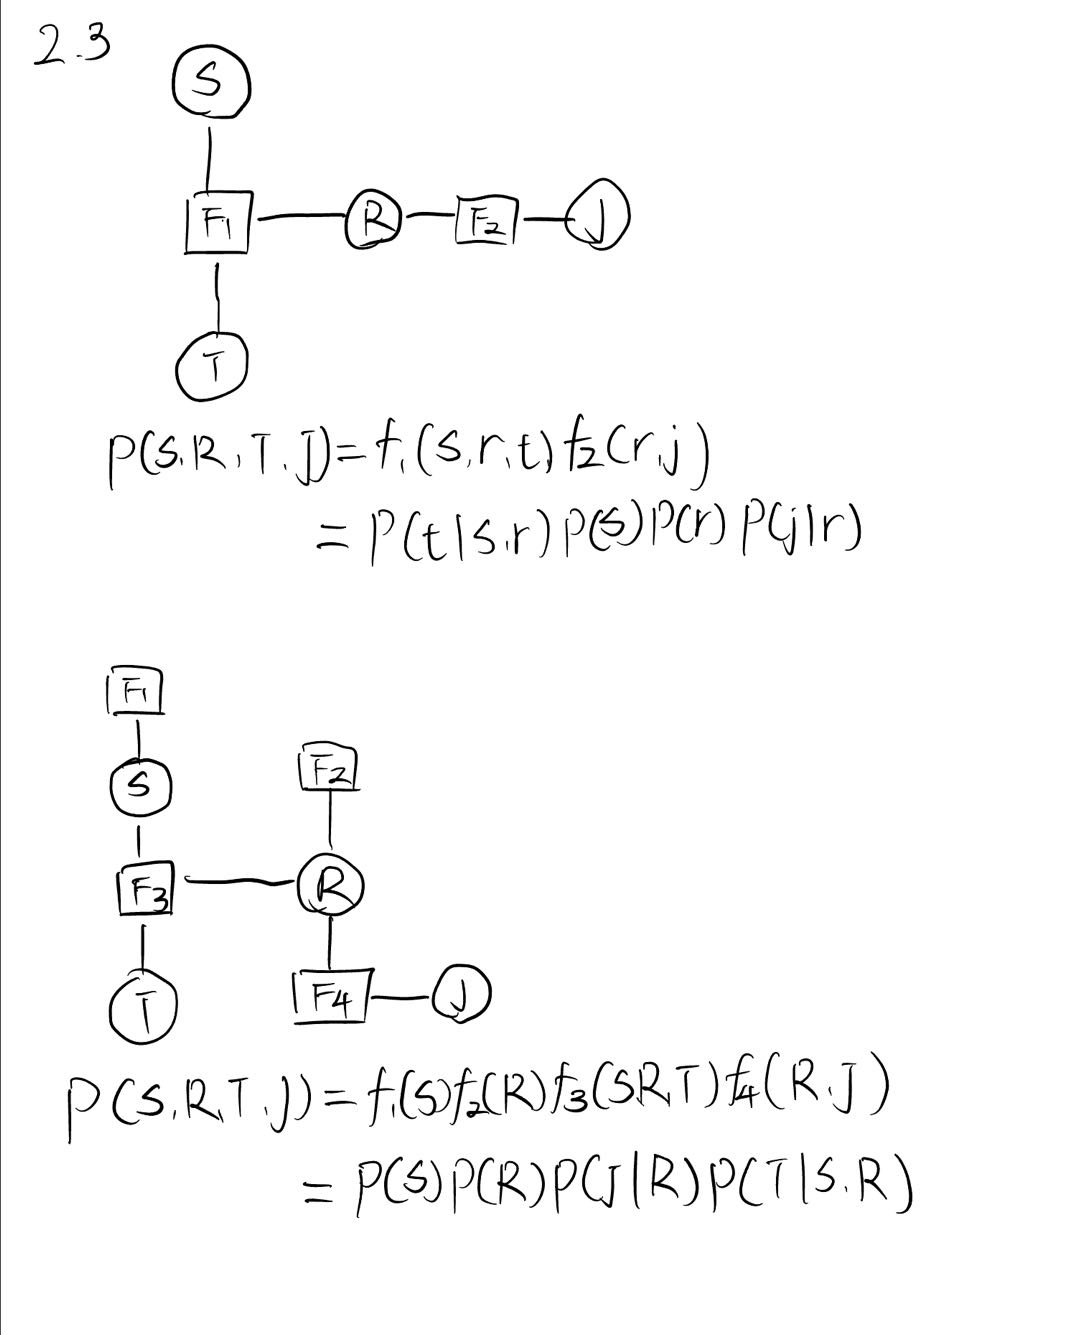

#  3
## 3.1
\begin{align*}
    \    mu_{a \to f_1} = 1\\
    \    mu_{b \to f_1} = 1\\
    \    mu_{d \to f_2} = 1\\
    \mu_{f_1 \to c} &= \sum_a \sum_b f_1(a, b, c) \mu_{a \to f_1} \mu_{b \to f_1} \\
    \mu_{f_2 \to c} &= \sum_d f_2(c, d)\mu_{d \to f_2}\\
\end{align*}

## 3.2
\begin{align*}
    p(c) &= \mu_{f_1 \to c}\mu_{f_2 \to c}=  \sum_a \sum_b f_1(a, b, c) \mu_{a \to f_1} \mu_{b \to f_1} \cdot \sum_d f_2(c, d)\mu_{d \to f_2}= \sum_a \sum_b f_1(a, b, c)  \sum_d f_2(c, d)
\end{align*}

## 3.3
\begin{align*}
    p(c) &= \sum_a \sum_b \sum_d p(a, b, c, d)= \sum_a \sum_b f_1(a, b, c)  \sum_d f_2(c, d)
\end{align*}

## 3.4

\begin{align*}
    p(c) &= \mu_{f_1 \to c} \mu_{f_2 \to c} \\
    &= \sum_a \sum_b f_1(a, b, c) \mu_{a \to f_1} \mu_{b \to f_1} \cdot \sum_b \sum_d f_2(b, c, d) \mu_{b \to f_2} \mu_{d \to f_2} \\
    &= \sum_a \sum_b f_1(a, b, c) \mu_{a \to f_1} \mu_{f_2 \to b} \cdot \sum_b \sum_d f_2(b, c, d) \mu_{d \to f_2} \mu_{f_1 \to b}   \\
    &=  \sum_a \sum_b f_1(a, b, c) \mu_{a \to f_1} \sum_c \sum_d f_2(b, c, d) \mu_{c \to f_2} \mu_{d \to f_2} \cdot \sum_b \sum_d f_2(b, c, d) \mu_{d \to f_2} \sum_a \sum_c f_1(a, b, c) \mu_{a \to f_1} \mu_{c \to f_1} \\
    &=  \sum_a \sum_b f_1(a, b, c) \sum_c \sum_d f_2(b, c, d) \mu_{c \to f_2} \cdot \sum_b \sum_d f_2(b, c, d)  \sum_a \sum_c f_1(a, b, c) \mu_{c \to f_1}\\
    &= \sum_a \sum_b f_1(a, b, c)  \mu_{f_2 \to b} \cdot \sum_b \sum_d f_2(b, c, d) \mu_{f_1 \to b} \\
    &= \ ...
\end{align*}

The equation become infinite loop.